In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict


# === 1. Charger le fichier ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"  # À adapter si besoin
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1,inplace=True)


# === 2. Identifier les colonnes "mod__var" ===
modvar_cols = [col for col in df.columns if '__' in col]

# === 3. Convertir les vecteurs SHAP de string en liste de float ===
def parse_vector(text):
    try:
        # Enlever les crochets et séparer par les espaces
        # print(type(text),text, "//")
        nombres_str = text.strip('[]').split()
        # Convertir en float
        # print(nombres_str, "..")
        liste = [float(x) for x in nombres_str]
        # print(liste, ".-.")
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan

# Appliquer à toutes les colonnes concernées
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
                shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# shap_data
# === 4. Conversion en DataFrame ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]
    # print(model)
    # print(agg[model])
# === 5. Heatmap ===
for model in df.index.values:
    plt.figure(figsize=(12, max(6, len(agg[model]) * 0.4)))
    sns.heatmap(agg[model], cmap="YlOrRd", annot=True, fmt=".2f")
    plt.title(f"Importance des variables par classe (moyenne SHAP des modalités) {model}")
    plt.xlabel("Classe")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict


In [57]:

# === 1. Charger le fichier ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"  # À adapter si besoin
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1,inplace=True)

In [58]:

# === 2. Identifier les colonnes "mod__var" ===
modvar_cols = [col for col in df.columns if '__' in col]

modvar_cols

['great_pret__parents',
 'pretentious__parents',
 'usual__parents',
 'critical__has_nurs',
 'improper__has_nurs',
 'less_proper__has_nurs',
 'proper__has_nurs',
 'very_crit__has_nurs',
 'complete__form',
 'completed__form',
 'foster__form',
 'incomplete__form',
 'convenient__housing',
 'critical__housing',
 'less_conv__housing',
 'convenient__finance',
 'inconv__finance',
 'nonprob__social',
 'problematic__social',
 'slightly_prob__social',
 'not_recom__health',
 'priority__health',
 'recommended__health']

In [59]:
df.index.values

array(['LDA', 'LR', 'SVM', 'DT', 'RF', 'XGB', 'MLP', 'PER'], dtype=object)

In [60]:
df

,great_pret__parents,pretentious__parents,usual__parents,critical__has_nurs,improper__has_nurs,less_proper__has_nurs,proper__has_nurs,very_crit__has_nurs,complete__form,completed__form,...,not_recom__health,priority__health,recommended__health,Att_DEGREE_GLO,Att_INTRA_GLO,Att_INTER_GLO,Att_COMBINE_GLO,Att_M_INTRA_GLO,Att_M_INTER_GLO,Att_M_COMBINE_GLO
LDA,[0.03995979 0.37878826 0.43651304 1.2241248 ],[0.06223613 0.1249545 0.01640806 0.80368334],[0.10537863 0.53902716 0.49498603 0.54775142],[0.13159738 0.22348037 0.13179327 0.54668155],[0.10122967 0.22006819 0.10025816 0.41612429],[0.08138675 0.25316934 0.27730706 1.51660878],[0.0463538 0.33393784 0.34368166 0.60997784],[0.06077517 0.41026384 0.41112716 0.63672723],[0.05984563 0.01371824 0.00531724 0.69908968],[0.08896684 0.23018657 0.20549092 0.88711942],...,[0. 0. 0. 0.],[0.1568992 0.40897768 0.34803453 1.28321825],[0.14018656 0.36541408 0.31096249 1.14653204],[0.01060402 0.51202513 0.77987774 3.59334823],[0. 0. 0. 0.],[0.01062695 0.51313256 0.78156448 3.60112002],[0.01065062 0.51427562 0.78330551 3.60914198],[0.06484315 0.44462158 0.76573403 3.59084409],[ 11655.49654702 79920.32030967 137639.988457...,[ 1.23507589 8.46876495 14.58503552 68.39527353]
LR,[0.02182553 0.17407932 0.37811919 0.2258654 ],[0.00738943 0.17749442 0.05784848 0.12703538],[0.01409001 0.31582308 0.40813748 0.10640441],[0.03746549 0.1111733 0.15751053 0.08380273],[0.03531344 0.14680778 0.00900494 0.12049928],[0.02471039 0.03720581 0.14947398 0.13697856],[0.00159613 0.25660919 0.3790486 0.12403554],[0.02028035 0.20965957 0.2429934 0.05361418],[0.03634048 0.04564523 0.01307451 0.09506022],[0.02768131 0.06696842 0.12913072 0.08984361],...,[1.14395886 0.49455844 0.57690565 0.07249477],[0.54599884 0.18965619 0.53844328 0.18210062],[0.62402172 0.31058486 0.08097378 0.23246307],[0.00571607 0.00356124 0.01499853 0.00572122],[3.86296696e-13 7.43956815e-13 1.01138977e-12 ...,[0.00534946 0.00334162 0.01405463 0.00536355],[0.00299636 0.00192127 0.00797424 0.00305661],[0.0048766 0.00718664 0.01933118 0.00726794],[9.66791115e-06 1.86182953e-05 2.53106026e-05 ...,[1.18814799e-05 1.50659840e-05 1.59740226e-05 ...
SVM,[1.01363232e-05 4.59752393e-05 5.46211231e-02 ...,[6.43485811e-05 5.44129781e-05 5.97072998e-02 ...,[4.50392786e-05 9.00249258e-05 1.26442147e-03 ...,[1.56693038e-04 2.92652504e-05 7.17280850e-03 ...,[1.86763813e-04 9.09100803e-05 0.00000000e+00 ...,[3.77823115e-05 6.85688327e-05 6.00889230e-02 ...,[1.44528087e-04 1.21625917e-04 1.43294431e-02 ...,[1.34719787e-04 3.09559396e-05 4.13482884e-02 ...,[3.33320019e-05 1.35223358e-05 2.29879692e-02 ...,[9.04995654e-06 4.95675463e-05 7.48092020e-02 ...,...,[0.59283315 0.59285437 0.32217679 0. 0...,[0.32248218 0.32264379 0. 0.22570974 0...,[0.28829061 0.28816685 0.3132584 0.20166752 0...,[6.96602274e-05 4.17201440e-04 2.14347992e-03 ...,[8.61397652e-26 0.00000000e+00 4.30698826e-26 ...,[6.52343988e-05 3.90694750e-04 2.00729497e-03 ...,[3.67762929e-05 2.20256565e-04 1.13162487e-03 ...,[0.00031341 0.00101715 0.00128705 0.02606779 0...,[1.57797959e-11 5.12122216e-11 6.48012066e-11 ...,[1.47763553e-07 4.79556129e-07 6.06804722e-07 ...
DT,[0. 0.03888896 0.03926876 0.01948815],[0. 0. 0. 0.],[0. 0.1518829 0.15034587 0.00800784],[0. 0.0235996 0.0235996 0. ],[0. 0. 0. 0.],[0. 0.02171665 0.02171665 0. ],[0. 0.08143314 0.09513316 0.02033928],[0. 0.01326596 0.01406111 0.00079515],[0. 0. 0. 0.],[0. 0.04619948 0.05444389 0.01970711],...,[0.44871795 0.21750243 0.21903629 0.01217922],[0. 0. 0. 0.],[0. 0.01501804 0.01501804 0. ],[0. 0. 0. 0.],[0. 0. 0. 0.],[0. 0.03389096 0.03693068 0.00775209],[0. 0.01658062 0.01658062 0. ],[0. 0. 0. 0.],[0. 0. 0. 0.],[0. 0. 0. 0.]
RF,[0.00338558 0.03423001 0.03637535 0.00332245],[0.00181071 0.01261799 0.01141394 0.00369803],[0.00876278 0.06425388 0.05383392 0.00278488],[0.00568536 0.02003103 0.01537784 0.00103217],[0.0031851 0.01366973 0.01103633 0.00159272],[0.003164 0.01156928 0.00938295 0.00108112],[0.00647046 0.032043 0.03321453 0.00735032],[0.004

In [61]:
# === 3. Convertir les vecteurs SHAP de string en liste de float ===
def parse_vector(text):
    try:
        # Enlever les crochets et séparer par les espaces
        # print(type(text),text, "//")
        nombres_str = text.strip('[]').split()
        # Convertir en float
        # print(nombres_str, "..")
        liste = [float(x) for x in nombres_str]
        # print(liste, ".-.")
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan



In [62]:
# Appliquer à toutes les colonnes concernées
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
                shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# shap_data

In [63]:
# === 4. Conversion en DataFrame ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]
    # print(model)
    # print(agg[model])

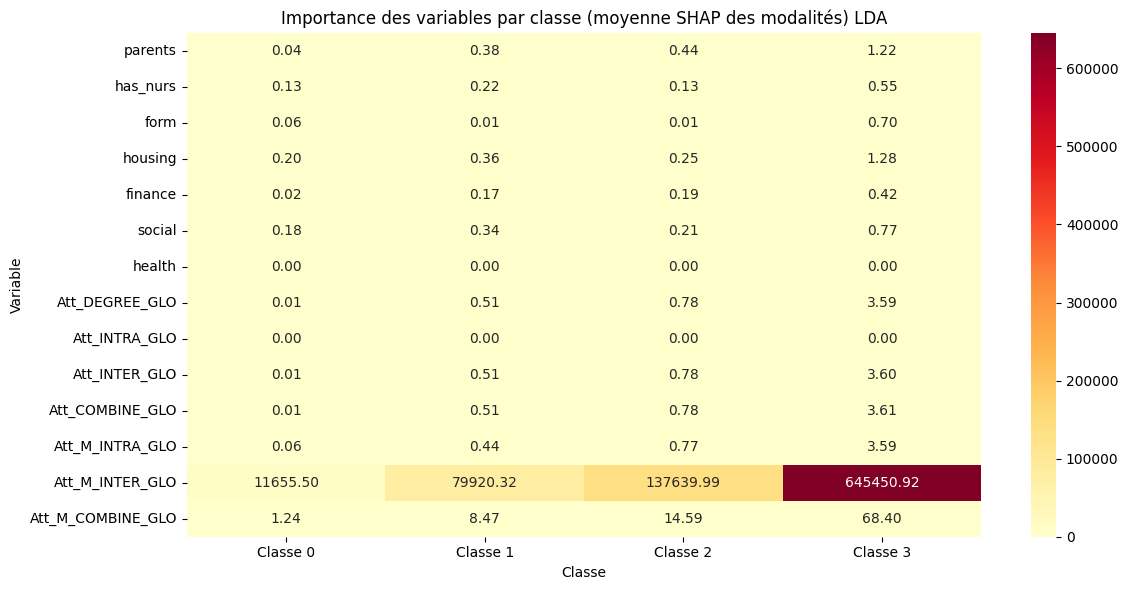

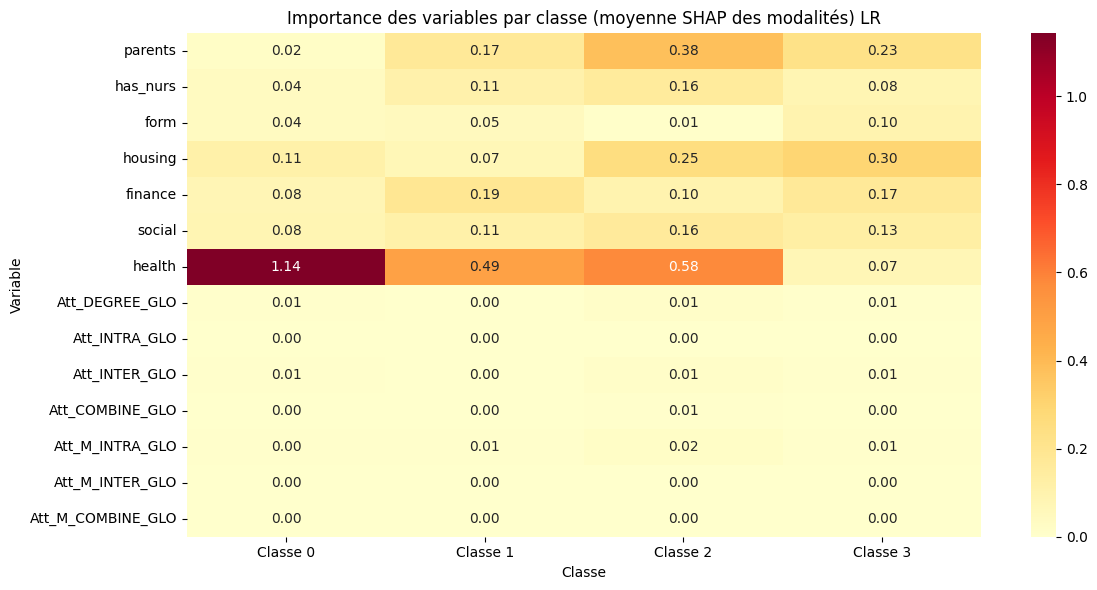

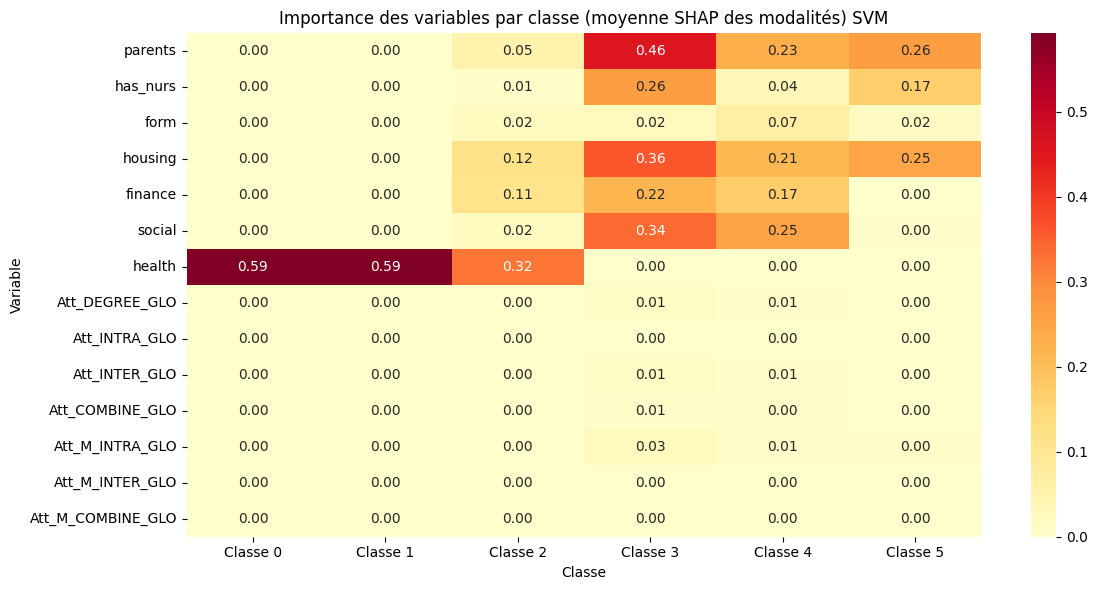

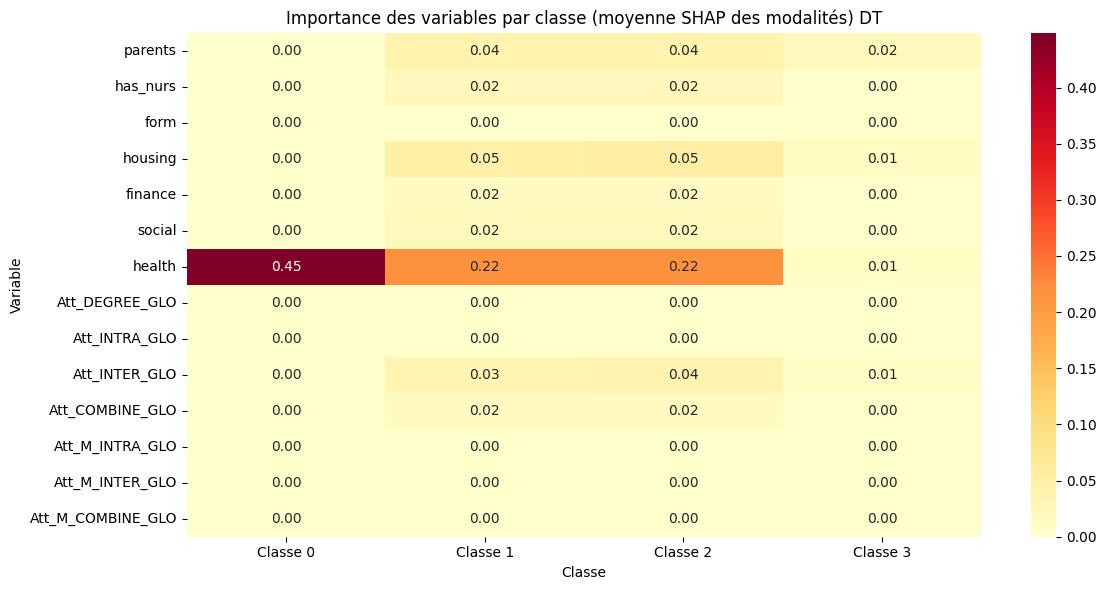

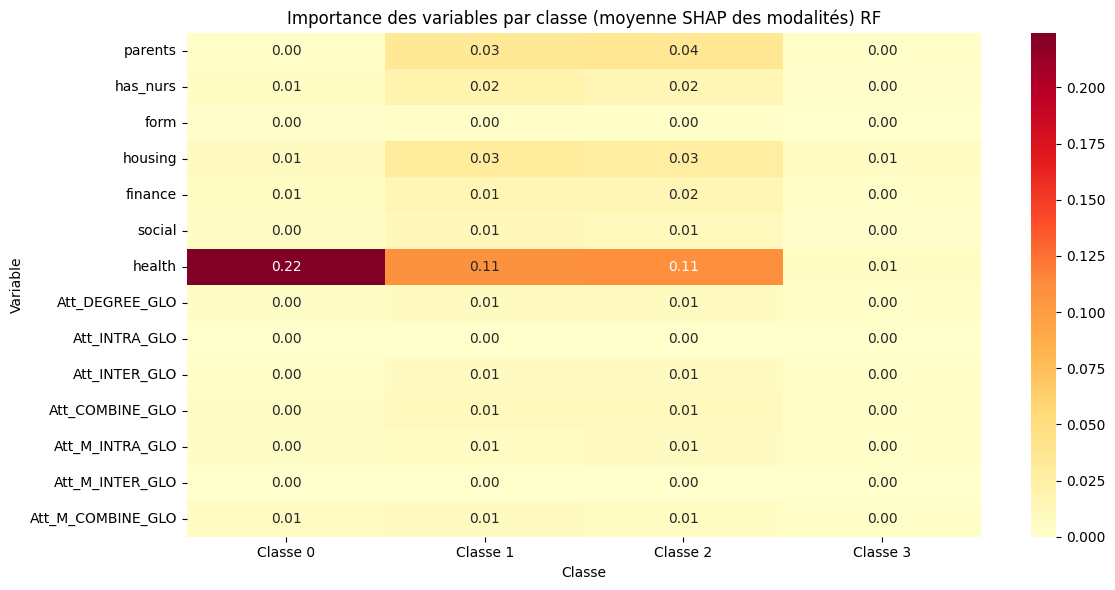

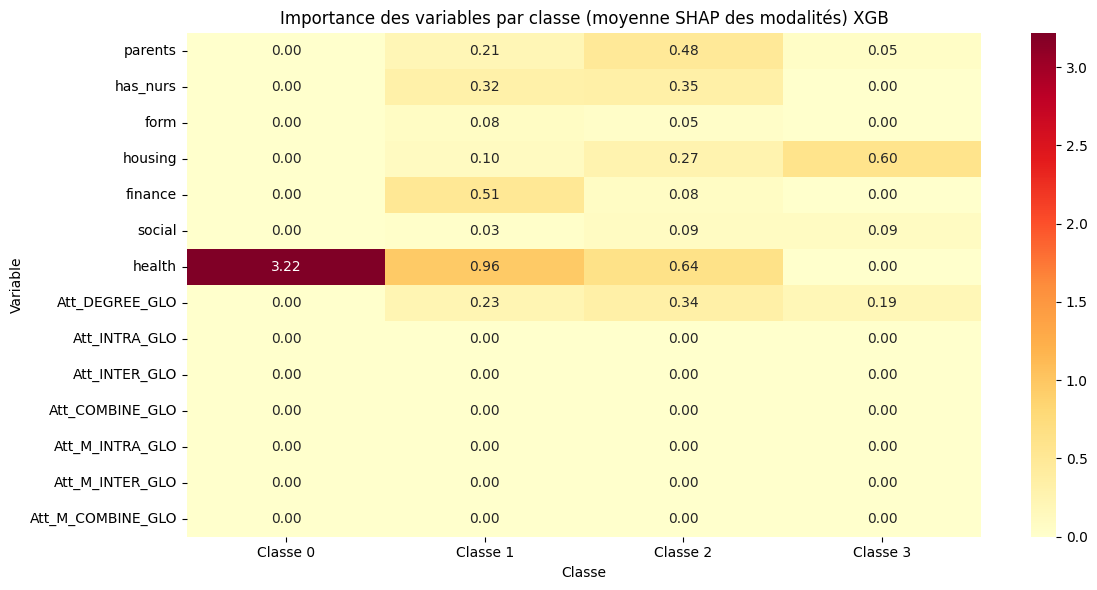

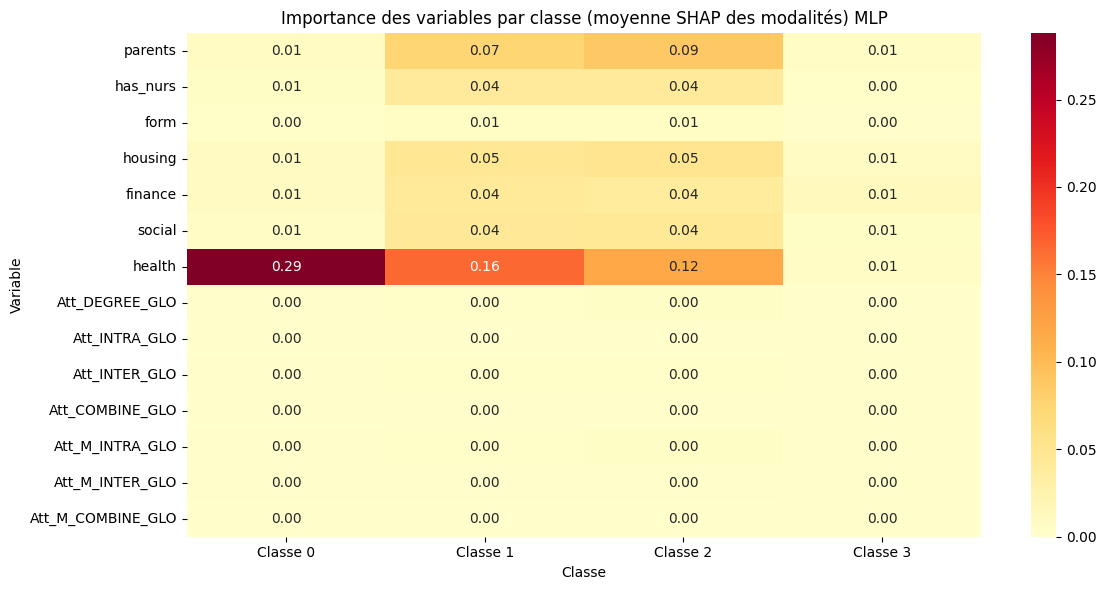

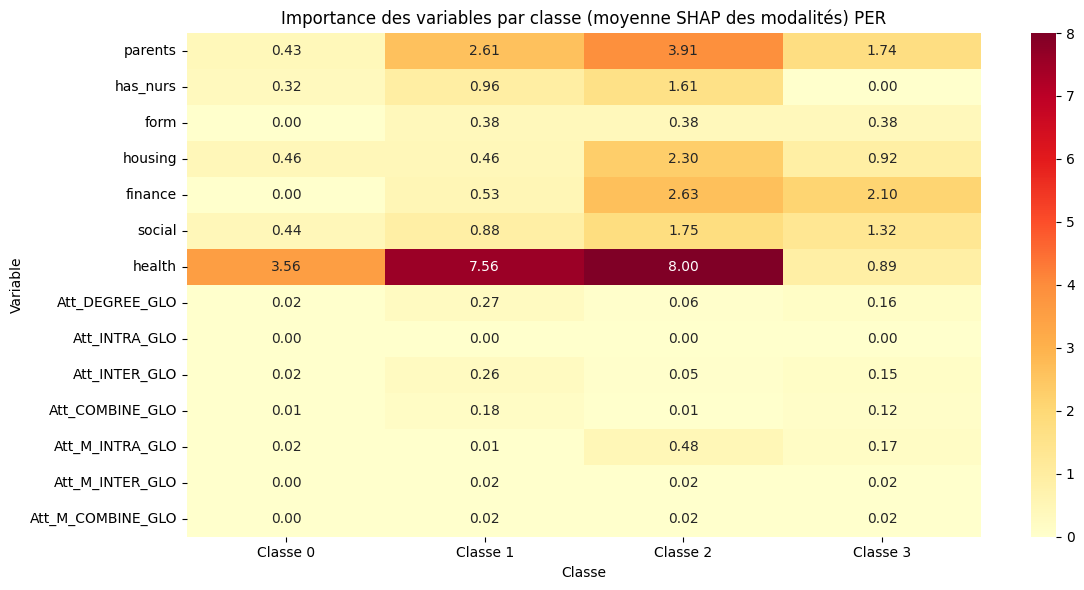

In [64]:
# === 5. Heatmap ===
for model in df.index.values:
    plt.figure(figsize=(12, max(6, len(agg[model]) * 0.4)))
    sns.heatmap(agg[model], cmap="YlOrRd", annot=True, fmt=".2f")
    plt.title(f"Importance des variables par classe (moyenne SHAP des modalités) {model}")
    plt.xlabel("Classe")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import os

# === 1. Charger le fichier ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1, inplace=True)

# === 2. Identifier les colonnes "mod__var" ===
modvar_cols = [col for col in df.columns if '__' in col]

# === 3. Convertir les vecteurs SHAP de string en liste de float ===
def parse_vector(text):
    try:
        nombres_str = text.strip('[]').split()
        liste = [float(x) for x in nombres_str]
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan

# Appliquer à toutes les colonnes concernées
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
                shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# === 4. Conversion en DataFrame ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]

# === 5. Fonctions pour générer LaTeX ===

def generate_latex_heatmap_data(df_matrix, model_name):
    """Génère les données de la heatmap au format LaTeX/pgfplots"""
    n_rows, n_cols = df_matrix.shape
    
    # Créer les coordonnées et valeurs
    data_lines = []
    for i in range(n_rows):
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            # Coordonnées: (colonne, ligne inversée pour avoir l'affichage correct)
            data_lines.append(f"{j} {n_rows-1-i} {value:.4f}")
    
    return "\n".join(data_lines)

def create_latex_heatmap(df_matrix, model_name, output_dir="latex_output"):
    """Crée un fichier LaTeX complet avec la heatmap"""
    
    # Créer le dossier de sortie si nécessaire
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    # Données de la matrice
    matrix_data = generate_latex_heatmap_data(df_matrix, model_name)
    
    # Template LaTeX
    latex_template = f"""\\documentclass{{article}}
\\usepackage{{pgfplots}}
\\usepackage{{tikz}}
\\usepackage{{geometry}}
\\usepackage{{xcolor}}
\\usepackage{{amsmath}}

\\geometry{{a4paper, margin=1cm}}
\\pgfplotsset{{compat=1.17}}

% Définir une colormap personnalisée (YlOrRd style)
\\pgfplotsset{{
    colormap/ylOrRd/.style={{
        colormap={{YlOrRd}}{{
            color(0cm)=(white);
            color(1cm)=(yellow);
            color(2cm)=(orange);
            color(3cm)=(red);
            color(4cm)=(darkred)
        }}
    }}
}}

\\begin{{document}}

\\title{{Importance des variables par classe (moyenne SHAP des modalités)}}
\\subtitle{{{model_name}}}
\\date{{}}
\\maketitle

\\begin{{center}}
\\begin{{tikzpicture}}
\\begin{{axis}}[
    width=15cm,
    height={max(8, n_rows * 0.8)}cm,
    colorbar,
    colormap name=ylOrRd,
    xlabel={{Classe}},
    ylabel={{Variable}},
    xtick={{{",".join(map(str, range(n_cols)))}}},
    ytick={{{",".join(map(str, range(n_rows)))}}},
    xticklabels={{{",".join([f"{{{label}}}" for label in col_labels])}}},
    yticklabels={{{",".join([f"{{{label}}}" for label in reversed(row_labels)])}}},
    x tick label style={{rotate=45, anchor=north east}},
    y tick label style={{font=\\footnotesize}},
    enlargelimits=false,
    axis on top=true,
]

\\addplot3[
    matrix plot*,
    mesh/cols={n_cols},
    point meta=explicit,
] table [meta=C] {{
x y C
{matrix_data}
}};

% Ajouter les annotations des valeurs
"""

    # Ajouter les annotations
    for i in range(n_rows):
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            latex_template += f"\\node at (axis cs:{j},{n_rows-1-i}) {{\\scriptsize {value:.2f}}};\n"

    latex_template += """
\\end{axis}
\\end{tikzpicture}
\\end{center}

\\end{document}"""

    # Sauvegarder le fichier
    filename = f"{output_dir}/heatmap_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_template)
    
    return filename

def create_standalone_heatmap(df_matrix, model_name, output_dir="latex_output"):
    """Crée une version standalone (compilable directement) de la heatmap"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    print(row_labels)
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    matrix_data = generate_latex_heatmap_data(df_matrix, model_name)
    
    # Version standalone plus simple
    latex_content = f"""\\documentclass[tikz,border=5pt]{{standalone}}
\\usepackage{{pgfplots}}
\\pgfplotsset{{compat=1.17}}

\\begin{{document}}
\\begin{{tikzpicture}}
\\begin{{axis}}[
    colorbar,
    colormap/hot,
    xlabel={{Classe}},
    ylabel={{Variable}},
    title={{{model_name}}},
    xtick={{{",".join(map(str, range(n_cols)))}}},
    ytick={{{",".join(map(str, range(n_rows)))}}},
    xticklabels={{{",".join([f"{{{label}}}" for label in col_labels])}}},
    yticklabels={{{",".join([f"{{{label}}}" for label in reversed(row_labels)])}}},
    x tick label style={{rotate=45, anchor=north east}},
    enlargelimits=false,
]

\\addplot3[
    matrix plot*,
    mesh/cols={n_cols},
    point meta=explicit,
] table [meta=C] {{
x y C
{matrix_data}
}};

\\end{{axis}}
\\end{{tikzpicture}}
\\end{{document}}"""

    filename = f"{output_dir}/standalone_heatmap_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

# === 6. Générer les heatmaps LaTeX ===
output_directory = "latex_heatmaps"

print("Génération des fichiers LaTeX...")
for model in df.index.values:
    # Version complète
    full_file = create_latex_heatmap(agg[model], model, f"{output_directory}/{model}")
    print(f"Fichier complet créé: {full_file}")
    
    # Version standalone
    standalone_file = create_standalone_heatmap(agg[model], model, f"{output_directory}/standalone/{model}")
    print(f"Fichier standalone créé: {standalone_file}")

print("\nFichiers LaTeX générés avec succès!")
print(f"Vous pouvez les compiler avec: pdflatex nom_du_fichier.tex")
print("\nPour compiler, vous devez avoir LaTeX installé avec les packages:")
print("- pgfplots")
print("- tikz") 
print("- geometry")
print("- xcolor")

Génération des fichiers LaTeX...
Fichier complet créé: latex_heatmaps/LDA/heatmap_LDA.tex
['parents', 'has_nurs', 'form', 'housing', 'finance', 'social', 'health', 'Att_DEGREE_GLO', 'Att_INTRA_GLO', 'Att_INTER_GLO', 'Att_COMBINE_GLO', 'Att_M_INTRA_GLO', 'Att_M_INTER_GLO', 'Att_M_COMBINE_GLO']
Fichier standalone créé: latex_heatmaps/standalone/LDA/standalone_heatmap_LDA.tex
Fichier complet créé: latex_heatmaps/LR/heatmap_LR.tex
['parents', 'has_nurs', 'form', 'housing', 'finance', 'social', 'health', 'Att_DEGREE_GLO', 'Att_INTRA_GLO', 'Att_INTER_GLO', 'Att_COMBINE_GLO', 'Att_M_INTRA_GLO', 'Att_M_INTER_GLO', 'Att_M_COMBINE_GLO']
Fichier standalone créé: latex_heatmaps/standalone/LR/standalone_heatmap_LR.tex
Fichier complet créé: latex_heatmaps/SVM/heatmap_SVM.tex
['parents', 'has_nurs', 'form', 'housing', 'finance', 'social', 'health', 'Att_DEGREE_GLO', 'Att_INTRA_GLO', 'Att_INTER_GLO', 'Att_COMBINE_GLO', 'Att_M_INTRA_GLO', 'Att_M_INTER_GLO', 'Att_M_COMBINE_GLO']
Fichier standalone créé:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import os

# === 1. Charger le fichier ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1, inplace=True)

# === 2. Identifier les colonnes "mod__var" ===
modvar_cols = [col for col in df.columns if '__' in col]

# === 3. Convertir les vecteurs SHAP de string en liste de float ===
def parse_vector(text):
    try:
        nombres_str = text.strip('[]').split()
        liste = [float(x) for x in nombres_str]
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan

# Appliquer à toutes les colonnes concernées
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
                shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# === 4. Conversion en DataFrame ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]

# === 5. Fonctions pour générer une vraie heatmap LaTeX ===

def value_to_color(value, vmin, vmax):
    """Convertit une valeur en couleur sur l'échelle YlOrRd"""
    # Normaliser la valeur entre 0 et 1
    normalized = (value - vmin) / (vmax - vmin) if vmax != vmin else 0
    
    # Définir les couleurs YlOrRd (du jaune clair au rouge foncé)
    if normalized <= 0.25:
        # Blanc à jaune clair
        intensity = normalized * 4
        return f"{{rgb:yellow,{intensity};white,{1-intensity}}}"
    elif normalized <= 0.5:
        # Jaune clair à orange
        intensity = (normalized - 0.25) * 4
        return f"{{rgb:orange,{intensity};yellow,{1-intensity}}}"
    elif normalized <= 0.75:
        # Orange à rouge
        intensity = (normalized - 0.5) * 4
        return f"{{rgb:red,{intensity};orange,{1-intensity}}}"
    else:
        # Rouge à rouge foncé
        intensity = (normalized - 0.75) * 4
        return f"{{rgb:red!{int(50 + intensity*50)}!black}}"

def create_latex_heatmap_table(df_matrix, model_name, output_dir="latex_output"):
    """Crée une vraie heatmap LaTeX avec des cellules colorées"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    # Calculer min et max pour la normalisation des couleurs
    values = df_matrix.values.flatten()
    vmin, vmax = np.min(values), np.max(values)
    
    # Créer le préambule LaTeX
    latex_content = f"""\\documentclass{{article}}
        \\usepackage[a4paper, margin=1cm]{{geometry}}
        \\usepackage{{xcolor}}
        \\usepackage{{colortbl}}
        \\usepackage{{array}}
        \\usepackage{{booktabs}}
        \\usepackage{{rotating}}
        \\usepackage{{adjustbox}}
        
        \\definecolor{{lightYellow}}{{RGB}}{{255,255,224}}
        \\definecolor{{orange}}{{RGB}}{{255,165,0}}
        \\definecolor{{darkRed}}{{RGB}}{{139,0,0}}
        
        \\begin{{document}}
        
        \\title{{Importance des variables par classe (moyenne SHAP des modalités)}}
        \\subtitle{{{model_name}}}
        \\date{{}}
        \\maketitle
        
        \\begin{{center}}
        \\adjustbox{{center}}{{
        \\begin{{tabular}}{{|l|""" + "c|" * n_cols + """}
        \\hline
        \\textbf{{Variable}} & """ + " & ".join([f"\\textbf{{{col}}}" for col in col_labels]) + """ \\\\
        \\hline
        """

    # Ajouter chaque ligne avec les couleurs
    for i, row_label in enumerate(row_labels):
        row_content = f"\\textbf{{{row_label}}}"
        
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            color = value_to_color(value, vmin, vmax)
            row_content += f" & \\cellcolor{color}\\textbf{{{value:.2f}}}"
        
        row_content += " \\\\\n\\hline\n"
        latex_content += row_content

    latex_content += """\\end{tabular}
    }
    \\end{center}
    
    % Légende de la colormap
    \\vspace{1cm}
    \\begin{center}
    \\textbf{Échelle des couleurs:} \\\\
    \\vspace{0.5cm}
    \\begin{tabular}{|c|c|c|c|c|}
    \\hline
    \\cellcolor{white} """ + f"{vmin:.2f}" + """ & 
    \\cellcolor{lightYellow} """ + f"{vmin + (vmax-vmin)*0.25:.2f}" + """ & 
    \\cellcolor{orange} """ + f"{vmin + (vmax-vmin)*0.5:.2f}" + """ & 
    \\cellcolor{red} """ + f"{vmin + (vmax-vmin)*0.75:.2f}" + """ & 
    \\cellcolor{darkRed} """ + f"{vmax:.2f}" + """ \\\\
    \\hline
    \\end{tabular}
    \\end{center}
    
    \\end{document}"""

    # Sauvegarder le fichier
    filename = f"{output_dir}/heatmap_table_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

def create_tikz_heatmap_grid(df_matrix, model_name, output_dir="latex_output"):
    """Crée une heatmap avec TikZ et des rectangles colorés"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    # Calculer min et max pour la normalisation
    values = df_matrix.values.flatten()
    vmin, vmax = np.min(values), np.max(values)
    
    def get_color_intensity(value):
        """Retourne l'intensité de couleur (0-100) pour une valeur"""
        if vmax == vmin:
            return 50
        normalized = (value - vmin) / (vmax - vmin)
        return int(normalized * 100)
    
    latex_content = f"""\\documentclass{{article}}
        \\usepackage[a4paper, margin=1cm]{{geometry}}
        \\usepackage{{tikz}}
        \\usepackage{{xcolor}}
        
        \\definecolor{{heatmapYellow}}{{RGB}}{{255,255,0}}
        \\definecolor{{heatmapOrange}}{{RGB}}{{255,165,0}}
        \\definecolor{{heatmapRed}}{{RGB}}{{255,0,0}}
        \\definecolor{{heatmapDarkRed}}{{RGB}}{{139,0,0}}
        
        \\begin{{document}}
        
        \\title{{Importance des variables par classe (moyenne SHAP des modalités)}}
        \\subtitle{{{model_name}}}
        \\date{{}}
        \\maketitle
        
        \\begin{{center}}
        \\begin{{tikzpicture}}[scale=1.2]
        
        % Dessiner la grille de la heatmap
        """

    cell_width = 2
    cell_height = 0.8
    
    # Dessiner les cellules colorées
    for i in range(n_rows):
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            intensity = get_color_intensity(value)
            
            x = j * cell_width
            y = -(i * cell_height)  # Inverser l'axe Y
            
            latex_content += f"""
                            % Cellule ({i},{j}) - valeur: {value:.2f}
                            \\fill[red!{intensity}!yellow] ({x},{y}) rectangle ({x + cell_width},{y - cell_height});
                            \\draw ({x},{y}) rectangle ({x + cell_width},{y - cell_height});
                            \\node at ({x + cell_width/2},{y - cell_height/2}) {{\\textbf{{{value:.2f}}}}};
                                    """

    # Ajouter les labels des colonnes
    for j, col_label in enumerate(col_labels):
        x = j * cell_width + cell_width/2
        latex_content += f"\\node[rotate=0] at ({x},{cell_height/2}) {{\\textbf{{{col_label}}}}};\n"
    
    # Ajouter les labels des lignes
    for i, row_label in enumerate(row_labels):
        y = -(i * cell_height) - cell_height/2
        latex_content += f"\\node[anchor=east] at (-0.2,{y}) {{\\textbf{{{row_label}}}}};\n"

    # Finaliser le contenu TikZ
    titre_classe = f"\\node at ({n_cols * cell_width / 2}, {cell_height * 1.5}) {{\\Large \\textbf{{Classe}}}};"
    titre_variable = f"\\node[rotate=90] at ({-1.5}, {-n_rows * cell_height / 2}) {{\\Large \\textbf{{Variable}}}};"
    
    latex_content += f"""
    % Titre des axes
    {titre_classe}
    {titre_variable}
    
    % Légende colorbar
    \\foreach \\y in {{0,1,2,3,4}} {{
        \\fill[red!{{\\y*20}}!yellow] ({n_cols * cell_width + 1}, {{-\\y*0.5}}) rectangle ({n_cols * cell_width + 1.5}, {{-\\y*0.5 - 0.4}});
        \\draw ({n_cols * cell_width + 1}, {{-\\y*0.5}}) rectangle ({n_cols * cell_width + 1.5}, {{-\\y*0.5 - 0.4}});
    }}
    
    % Valeurs de la légende
    \\node[anchor=west] at ({n_cols * cell_width + 1.7}, -0.2) {{{vmin:.2f}}};
    \\node[anchor=west] at ({n_cols * cell_width + 1.7}, -2.2) {{{vmax:.2f}}};
    
    \\end{{tikzpicture}}
    \\end{{center}}
    
    \\end{{document}}"""

    filename = f"{output_dir}/heatmap_tikz_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

# === 6. Générer les vraies heatmaps LaTeX ===
output_directory = "latex_heatmaps"

print("Génération des vraies heatmaps LaTeX...")
for model in df.index.values:
    # Version tableau avec cellules colorées
    table_file = create_latex_heatmap_table(agg[model], model, f"{output_directory}/{model}")
    print(f"Heatmap tableau créée: {table_file}")
    
    # Version TikZ avec rectangles colorés
    tikz_file = create_tikz_heatmap_grid(agg[model], model, f"{output_directory}/grid/{model}")
    print(f"Heatmap TikZ créée: {tikz_file}")

print("\nFichiers LaTeX de heatmaps générés avec succès!")
print(f"Vous pouvez les compiler avec: pdflatex nom_du_fichier.tex")
print("\nPour compiler, vous devez avoir LaTeX installé avec les packages:")
print("- xcolor")
print("- colortbl") 
print("- array")
print("- booktabs")
print("- tikz (pour la version TikZ)")
print("- adjustbox")

Génération des vraies heatmaps LaTeX...
Heatmap tableau créée: latex_heatmaps/LDA/heatmap_table_LDA.tex
Heatmap TikZ créée: latex_heatmaps/grid/LDA/heatmap_tikz_LDA.tex
Heatmap tableau créée: latex_heatmaps/LR/heatmap_table_LR.tex
Heatmap TikZ créée: latex_heatmaps/grid/LR/heatmap_tikz_LR.tex
Heatmap tableau créée: latex_heatmaps/SVM/heatmap_table_SVM.tex
Heatmap TikZ créée: latex_heatmaps/grid/SVM/heatmap_tikz_SVM.tex
Heatmap tableau créée: latex_heatmaps/DT/heatmap_table_DT.tex
Heatmap TikZ créée: latex_heatmaps/grid/DT/heatmap_tikz_DT.tex
Heatmap tableau créée: latex_heatmaps/RF/heatmap_table_RF.tex
Heatmap TikZ créée: latex_heatmaps/grid/RF/heatmap_tikz_RF.tex
Heatmap tableau créée: latex_heatmaps/XGB/heatmap_table_XGB.tex
Heatmap TikZ créée: latex_heatmaps/grid/XGB/heatmap_tikz_XGB.tex
Heatmap tableau créée: latex_heatmaps/MLP/heatmap_table_MLP.tex
Heatmap TikZ créée: latex_heatmaps/grid/MLP/heatmap_tikz_MLP.tex
Heatmap tableau créée: latex_heatmaps/PER/heatmap_table_PER.tex
Heatm

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import os

# === 1. Charger le fichier ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1, inplace=True)

# === 2. Identifier les colonnes "mod__var" ===
modvar_cols = [col for col in df.columns if '__' in col]

# === 3. Convertir les vecteurs SHAP de string en liste de float ===
def parse_vector(text):
    try:
        nombres_str = text.strip('[]').split()
        liste = [float(x) for x in nombres_str]
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan

# Appliquer à toutes les colonnes concernées
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
                shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# === 4. Conversion en DataFrame ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]

# === 5. Fonctions pour générer une vraie heatmap LaTeX ===

def value_to_color(value, vmin, vmax):
    """Convertit une valeur en couleur sur l'échelle YlOrRd"""
    # Normaliser la valeur entre 0 et 1
    normalized = (value - vmin) / (vmax - vmin) if vmax != vmin else 0.5
    
    # Arrondir pour éviter les débordements arithmétiques
    normalized = round(normalized, 3)
    normalized = max(0, min(1, normalized))  # Assurer que c'est entre 0 et 1
    
    # Utiliser une approche plus simple avec des pourcentages entiers
    if normalized <= 0.2:
        # Très faible: blanc à jaune très clair  
        intensity = int(normalized * 500)  # 0 à 100
        return f"{{yellow!{intensity}!white}}"
    elif normalized <= 0.4:
        # Faible: jaune clair à jaune
        intensity = int((normalized - 0.2) * 500) + 20  # 20 à 120
        return f"{{yellow!{min(100, intensity)}}}"
    elif normalized <= 0.6:
        # Moyen: jaune à orange
        intensity = int((normalized - 0.4) * 500)  # 0 à 100
        return f"{{orange!{intensity}!yellow}}"
    elif normalized <= 0.8:
        # Fort: orange à rouge
        intensity = int((normalized - 0.6) * 500)  # 0 à 100
        return f"{{red!{intensity}!orange}}"
    else:
        # Très fort: rouge à rouge foncé
        intensity = int((normalized - 0.8) * 250) + 50  # 50 à 100
        return f"{{red!{min(100, intensity)}!black}}"

def create_latex_heatmap_table(df_matrix, model_name, output_dir="latex_output"):
    """Crée une vraie heatmap LaTeX avec des cellules colorées"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    
    # Calculer min et max pour la normalisation des couleurs
    values = df_matrix.values.flatten()
    vmin, vmax = np.min(values), np.max(values)
    
    # Créer le préambule LaTeX
    latex_content = f"""\\documentclass{{article}}
\\usepackage[a4paper, margin=1cm]{{geometry}}
\\usepackage{{xcolor}}
\\usepackage{{colortbl}}
\\usepackage{{array}}
\\usepackage{{booktabs}}
\\usepackage{{rotating}}
\\usepackage{{adjustbox}}

\\definecolor{{lightYellow}}{{RGB}}{{255,255,224}}
\\definecolor{{orange}}{{RGB}}{{255,165,0}}
\\definecolor{{darkRed}}{{RGB}}{{139,0,0}}

\\begin{{document}}

\\title{{Importance des variables par classe (moyenne SHAP des modalités) - {model_name}}}
\\date{{}}
\\maketitle

\\begin{{center}}
\\adjustbox{{center}}{{
\\begin{{tabular}}{{|l|""" + "c|" * n_cols + """}
\\hline
\\textbf{{Variable}} & """ + " & ".join([f"\\textbf{{{col}}}" for col in col_labels]) + """ \\\\
\\hline
"""

    # Ajouter chaque ligne avec les couleurs
    for i, row_label in enumerate(row_labels):
        row_content = f"\\textbf{{{row_label}}}"
        
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            color = value_to_color(value, vmin, vmax)
            row_content += f" & \\cellcolor{color}\\textbf{{{value:.2f}}}"
        
        row_content += " \\\\\n\\hline\n"
        latex_content += row_content

    latex_content += """\\end{tabular}
}
\\end{center}

% Légende de la colormap
\\vspace{1cm}
\\begin{center}
\\textbf{Échelle des couleurs:} \\\\
\\vspace{0.5cm}
\\begin{tabular}{|c|c|c|c|c|}
\\hline
\\cellcolor{white} """ + f"{vmin:.2f}" + """ & 
\\cellcolor{lightYellow} """ + f"{vmin + (vmax-vmin)*0.25:.2f}" + """ & 
\\cellcolor{orange} """ + f"{vmin + (vmax-vmin)*0.5:.2f}" + """ & 
\\cellcolor{red} """ + f"{vmin + (vmax-vmin)*0.75:.2f}" + """ & 
\\cellcolor{darkRed} """ + f"{vmax:.2f}" + """ \\\\
\\hline
\\end{tabular}
\\end{center}

\\end{document}"""

    # Sauvegarder le fichier
    filename = f"{output_dir}/heatmap_table_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

def create_tikz_heatmap_grid(df_matrix, model_name, output_dir="latex_output"):
    """Crée une heatmap avec TikZ et des rectangles colorés"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_rows, n_cols = df_matrix.shape
    row_labels = df_matrix.index.tolist()
    col_labels = df_matrix.columns.tolist()
    row_labels = [x.replace("_","\\_") for x in row_labels ]
    
    # Calculer min et max pour la normalisation
    values = df_matrix.values.flatten()
    vmin, vmax = np.min(values), np.max(values)
    
    def get_color_intensity(value):
        """Retourne l'intensité de couleur (0-100) pour une valeur"""
        if vmax == vmin:
            return 50
        normalized = (value - vmin) / (vmax - vmin)
        normalized = max(0, min(1, normalized))  # Assurer entre 0 et 1
        return int(round(normalized * 100))
    
    latex_content = f"""\\documentclass{{article}}
\\usepackage[a4paper, margin=1cm]{{geometry}}
\\usepackage{{tikz}}
\\usepackage{{xcolor}}

\\definecolor{{heatmapYellow}}{{RGB}}{{255,255,0}}
\\definecolor{{heatmapOrange}}{{RGB}}{{255,165,0}}
\\definecolor{{heatmapRed}}{{RGB}}{{255,0,0}}
\\definecolor{{heatmapDarkRed}}{{RGB}}{{139,0,0}}

\\begin{{document}}

\\title{{Importance des variables par classe (moyenne SHAP des modalités) - {model_name}}}
\\date{{}}
\\maketitle

\\begin{{center}}
\\begin{{tikzpicture}}[scale=1.2]

% Dessiner la grille de la heatmap
"""

    cell_width = 2
    cell_height = 0.8
    
    # Dessiner les cellules colorées
    for i in range(n_rows):
        for j in range(n_cols):
            value = df_matrix.iloc[i, j]
            intensity = get_color_intensity(value)
            
            x = j * cell_width
            y = -(i * cell_height)  # Inverser l'axe Y
            
            latex_content += f"""
% Cellule ({i},{j}) - valeur: {value:.2f}
\\fill[red!{intensity}!yellow] ({x},{y}) rectangle ({x + cell_width},{y - cell_height});
\\draw ({x},{y}) rectangle ({x + cell_width},{y - cell_height});
\\node at ({x + cell_width/2},{y - cell_height/2}) {{\\textbf{{{value:.2f}}}}};
"""

    # Ajouter les labels des colonnes
    for j, col_label in enumerate(col_labels):
        x = j * cell_width + cell_width/2
        latex_content += f"\\node[rotate=0] at ({x},{cell_height/2}) {{\\textbf{{{col_label}}}}};\n"
    
    # Ajouter les labels des lignes
    for i, row_label in enumerate(row_labels):
        y = -(i * cell_height) - cell_height/2
        latex_content += f"\\node[anchor=east] at (-0.2,{y}) {{\\textbf{{{row_label}}}}};\n"

    # Finaliser le contenu TikZ
    titre_classe = f"\\node at ({n_cols * cell_width / 2}, {cell_height * 1.5}) {{\\Large \\textbf{{Classe}}}};"
    titre_variable = f"\\node[rotate=90] at ({-1.5}, {-n_rows * cell_height / 2}) {{\\Large \\textbf{{Variable}}}};"
    
    latex_content += f"""
% Titre des axes
{titre_classe}
{titre_variable}

% Légende colorbar
\\foreach \\y in {{0,1,2,3,4}} {{
    \\fill[red!{{\\y*20}}!yellow] ({n_cols * cell_width + 1}, {{-\\y*0.5}}) rectangle ({n_cols * cell_width + 1.5}, {{-\\y*0.5 - 0.4}});
    \\draw ({n_cols * cell_width + 1}, {{-\\y*0.5}}) rectangle ({n_cols * cell_width + 1.5}, {{-\\y*0.5 - 0.4}});
}}

% Valeurs de la légende
\\node[anchor=west] at ({n_cols * cell_width + 1.7}, -0.2) {{{vmin:.2f}}};
\\node[anchor=west] at ({n_cols * cell_width + 1.7}, -2.2) {{{vmax:.2f}}};

\\end{{tikzpicture}}
\\end{{center}}

\\end{{document}}"""

    filename = f"{output_dir}/heatmap_tikz_{model_name.replace(' ', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

# === 6. Générer les vraies heatmaps LaTeX ===
output_directory = "latex_heatmaps"

print("Génération des vraies heatmaps LaTeX...")
for model in df.index.values:
    # Version tableau avec cellules colorées
    table_file = create_latex_heatmap_table(agg[model], model, f"{output_directory}/{model}")
    print(f"Heatmap tableau créée: {table_file}")
    
    # Version TikZ avec rectangles colorés
    tikz_file = create_tikz_heatmap_grid(agg[model], model, f"{output_directory}/grid/{model}")
    print(f"Heatmap TikZ créée: {tikz_file}")

print("\nFichiers LaTeX de heatmaps générés avec succès!")
print(f"Vous pouvez les compiler avec: pdflatex nom_du_fichier.tex")
print("\nPour compiler, vous devez avoir LaTeX installé avec les packages:")
print("- xcolor")
print("- colortbl") 
print("- array")
print("- booktabs")
print("- tikz (pour la version TikZ)")
print("- adjustbox")

Génération des vraies heatmaps LaTeX...
Heatmap tableau créée: latex_heatmaps/LDA/heatmap_table_LDA.tex
Heatmap TikZ créée: latex_heatmaps/grid/LDA/heatmap_tikz_LDA.tex
Heatmap tableau créée: latex_heatmaps/LR/heatmap_table_LR.tex
Heatmap TikZ créée: latex_heatmaps/grid/LR/heatmap_tikz_LR.tex
Heatmap tableau créée: latex_heatmaps/SVM/heatmap_table_SVM.tex
Heatmap TikZ créée: latex_heatmaps/grid/SVM/heatmap_tikz_SVM.tex
Heatmap tableau créée: latex_heatmaps/DT/heatmap_table_DT.tex
Heatmap TikZ créée: latex_heatmaps/grid/DT/heatmap_tikz_DT.tex
Heatmap tableau créée: latex_heatmaps/RF/heatmap_table_RF.tex
Heatmap TikZ créée: latex_heatmaps/grid/RF/heatmap_tikz_RF.tex
Heatmap tableau créée: latex_heatmaps/XGB/heatmap_table_XGB.tex
Heatmap TikZ créée: latex_heatmaps/grid/XGB/heatmap_tikz_XGB.tex
Heatmap tableau créée: latex_heatmaps/MLP/heatmap_table_MLP.tex
Heatmap TikZ créée: latex_heatmaps/grid/MLP/heatmap_tikz_MLP.tex
Heatmap tableau créée: latex_heatmaps/PER/heatmap_table_PER.tex
Heatm

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import os

# === 1. Charger et traiter les données ===
file_path = "results/NUR/0.1/cat/mlna_1/children/global/withoutClass/evaluation/MCA_GLO_MX_for_children_metric_2025_05_24_23_29_27.csv"
df = pd.read_csv(file_path, index_col=0)
df.drop(["precision","accuracy","recall","f1-score"], axis=1, inplace=True)

# === 2. Parser les vecteurs SHAP ===
def parse_vector(text):
    try:
        nombres_str = text.strip('[]').split()
        liste = [float(x) for x in nombres_str]
        return liste
    except Exception as e:
        print(f"Erreur parsing: {text} → {e}")
        return np.nan

# Traitement des données SHAP
shap_data = {}
for model in df.index.values:
    shap_data[model] = {}
    for col in df.columns:
        parsed = parse_vector(str(df.loc[[model],col].values[0]))
        
        if isinstance(parsed, list) is True:
            if '__' in col :
                _, var = col.split('__', 1)
            else:
                var = col
                
            if not var in shap_data[model].keys():
                shap_data[model][var] = []
                
            shap_data[model][var] = np.mean([parsed,shap_data[model][var]], axis=0) if len(shap_data[model][var]) > 0 else parsed

# === 3. Conversion en DataFrame avec tri par importance ===
agg = {}
for model in df.index.values:
    agg[model] = pd.DataFrame(shap_data[model]).T
    agg[model].columns = [f'Classe {i}' for i in range(agg[model].shape[1])]
    
    # Calculer l'importance totale et trier (DÉCROISSANT = plus important en premier)
    agg[model]['total_importance'] = agg[model].abs().sum(axis=1)
    agg[model] = agg[model].sort_values('total_importance', ascending=False)
    agg[model] = agg[model].drop('total_importance', axis=1)

# === 4. Définir les couleurs pour chaque classe ===
class_colors = {
    'Classe 0': '{RGB}{255,20,147}',   # Rose/Magenta
    'Classe 1': '{RGB}{34,139,34}',    # Vert
    'Classe 2': '{RGB}{255,69,0}',     # Rouge
    'Classe 3': '{RGB}{30,144,255}',   # Bleu
}

def get_additional_colors(n_classes):
    """Génère des couleurs supplémentaires si plus de 4 classes"""
    additional_colors = [
        '{RGB}{148,0,211}',   # Violet
        '{RGB}{255,140,0}',   # Orange foncé
        '{RGB}{0,191,255}',   # Bleu ciel
        '{RGB}{50,205,50}',   # Vert clair
    ]
    
    all_colors = {}
    base_colors = list(class_colors.values())
    
    for i in range(n_classes):
        if i < len(base_colors):
            all_colors[f'Classe {i}'] = base_colors[i]
        else:
            all_colors[f'Classe {i}'] = additional_colors[(i - len(base_colors)) % len(additional_colors)]
    
    return all_colors

# === 5. Fonction pour créer un SHAP summary plot standalone ===
def create_standalone_shap_plot(df_shap, model_name, output_dir="latex_shap_plots"):
    """Crée un SHAP summary plot standalone pour un modèle"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    n_features, n_classes = df_shap.shape
    feature_names = [name.replace("_", "\\_") for name in df_shap.index.tolist()]
    class_names = df_shap.columns.tolist()
    
    # Obtenir les couleurs pour toutes les classes
    colors = get_additional_colors(n_classes)
    
    # Calculer les valeurs maximales pour l'axe X
    max_val = df_shap.abs().max().max()
    x_max = max_val * 1.1
    
    latex_content = f"""\\documentclass[tikz,border=10pt]{{standalone}}
\\usepackage[a4paper, margin=1.5cm]{{geometry}}
\\usepackage{{pgfplots}}
\\usepackage{{xcolor}}
\\usepackage{{tikz}}
\\pgfplotsset{{compat=1.17}}

% Définition des couleurs pour chaque classe
"""
    
    # Ajouter les définitions de couleurs
    for class_name, color_def in colors.items():
        color_key = class_name.lower().replace(' ', '')
        latex_content += f"\\definecolor{{{color_key}}}{color_def}\n"
    
    latex_content += f"""
\\begin{{document}}

\\begin{{figure}}[htbp]
\\centering
\\begin{{tikzpicture}}
\\begin{{axis}}[
    xbar stacked,
    width=14cm,
    height={max(8, n_features * 0.4)}cm,
    xlabel={{Importance moyenne |SHAP| par classe}},
    ylabel={{Variables}},
    xmin=0,
    xmax={x_max:.3f},
    ytick=data,
    yticklabels={{%
        {', '.join(feature_names)}
    }},
    bar width={max(6, 20 - n_features)}pt,
    legend style={{
        at={{(1.02,0.5)}},
        anchor=west,
        legend columns=1
    }},
    grid=major,
    grid style={{gray!30}},
    title={{{model_name} - SHAP Summary Plot}},
    y dir=reverse
]

"""
    
    # Ajouter les données pour chaque classe
    for i, class_name in enumerate(class_names):
        color_key = class_name.lower().replace(' ', '')
        values = df_shap[class_name].abs().values
        
        # PAS d'inversion ici - on garde l'ordre du DataFrame (déjà trié par importance décroissante)
        coordinates = ' '.join([f"({val:.4f},{j})" for j, val in enumerate(values)])
        
        latex_content += f"""% {class_name}
\\addplot[fill={color_key}, draw=none] coordinates {{
    {coordinates}
}};

"""
    
    # Ajouter la légende
    legend_entries = ', '.join(class_names)
    latex_content += f"""\\legend{{{legend_entries}}}
\\end{{axis}}
\\end{{tikzpicture}}
\\caption{{Importance des variables SHAP pour le modèle {model_name} (ordre décroissant d'importance)}}
\\label{{fig:shap_{model_name.replace(' ', '_').lower()}}}
\\end{{figure}}

\\end{{document}}"""

    filename = f"{output_dir}/shap_plot_{model_name.replace(' ', '_').replace('/', '_')}.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

# === 6. Fonction pour créer une grille 4x2 de SHAP plots ===
def create_shap_grid_4x2(agg_dict, output_dir="latex_shap_plots"):
    """Crée une grille 4x2 de SHAP summary plots pour 8 modèles"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    model_names = list(agg_dict.keys())[:8]  # Prendre les 8 premiers modèles
    
    if len(model_names) < 8:
        print(f"Attention: Seulement {len(model_names)} modèles disponibles, la grille sera incomplète.")
    
    # Déterminer le nombre de classes et features
    sample_model = model_names[0]
    n_classes = agg_dict[sample_model].shape[1]
    max_features = max([agg_dict[model].shape[0] for model in model_names])
    
    # Obtenir les couleurs
    colors = get_additional_colors(n_classes)
    
    latex_content = f"""% \\documentclass[tikz,border=10pt]{{standalone}}
\\documentclass{{article}}
\\usepackage[a3paper, landscape, margin=1cm]{{geometry}}
\\usepackage{{pgfplots}}
\\usepackage{{xcolor}}
\\usepackage{{tikz}}
\\usepackage{{subcaption}}
\\pgfplotsset{{compat=1.17}}

% Définition des couleurs pour chaque classe
"""
    
    # Ajouter les définitions de couleurs
    for class_name, color_def in colors.items():
        color_key = class_name.lower().replace(' ', '')
        latex_content += f"\\definecolor{{{color_key}}}{color_def}\n"
    
    latex_content += f"""
\\begin{{document}}

\\begin{{figure}}[htbp]
\\centering
\\caption{{Comparaison des SHAP Summary Plots pour tous les modèles (ordre décroissant d'importance)}}
\\label{{fig:shap_grid_all_models}}

"""
    
    # Créer la grille 4x2
    for i, model_name in enumerate(model_names):
        if i % 4 == 0:  # Nouvelle ligne
            if i > 0:
                latex_content += "\\end{minipage}\n\n"
            latex_content += "\\begin{minipage}{\\textwidth}\n"
        
        df_shap = agg_dict[model_name]
        n_features = df_shap.shape[0]
        feature_names = [name.replace("_", "\\_") for name in df_shap.index.tolist()]
        class_names = df_shap.columns.tolist()
        
        # Calculer les valeurs maximales
        max_val = df_shap.abs().max().max()
        x_max = max_val * 1.1
        
        latex_content += f"""
\\begin{{subfigure}}[t]{{0.48\\textwidth}}
\\centering
\\begin{{tikzpicture}}
\\begin{{axis}}[
    xbar stacked,
    width=7cm,
    height={max(4, n_features * 0.25)}cm,
    xlabel={{|SHAP|}},
    xmin=0,
    xmax={x_max:.3f},
    ytick=data,
    yticklabels={{%
        {', '.join(feature_names)}
    }},
    bar width={max(3, 10 - n_features//2)}pt,
    legend style={{
        at={{(1.02,0.5)}},
        anchor=west,
        legend columns=1,
        font=\\tiny
    }},
    grid=major,
    grid style={{gray!30}},
    title={{{model_name}}},
    title style={{font=\\small}},
    tick label style={{font=\\tiny}},
    label style={{font=\\small}},
]

"""
        
        # Ajouter les données pour chaque classe
        for j, class_name in enumerate(class_names):
            color_key = class_name.lower().replace(' ', '')
            # PAS d'inversion ici non plus - on garde l'ordre d'importance décroissante
            values = df_shap[class_name].abs().values
            
            coordinates = ' '.join([f"({val:.4f},{k})" for k, val in enumerate(values)])
            
            latex_content += f"""\\addplot[fill={color_key}, draw=none] coordinates {{
    {coordinates}
}};
"""
        
        # Ajouter la légende seulement pour le premier subplot
        if i == 0:
            legend_entries = ', '.join(class_names)
            latex_content += f"\\legend{{{legend_entries}}}\n"
        
        latex_content += f"""\\end{{axis}}
\\end{{tikzpicture}}
\\caption{{{model_name}}}
\\end{{subfigure}}"""
        
        # Ajouter un espace horizontal entre les colonnes
        if i % 2 == 0 and i < len(model_names) - 1:
            latex_content += "\\hfill\n"
        else:
            latex_content += "\n\n"
    
    # Fermer la dernière minipage
    if model_names:
        latex_content += "\\end{minipage}\n"
    
    latex_content += """
\\end{figure}

\\end{document}"""

    filename = f"{output_dir}/shap_grid_4x2_all_models.tex"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(latex_content)
    
    return filename

# === 7. Génération des fichiers LaTeX ===
def generate_all_shap_plots(agg_dict, output_dir="latex_shap_plots"):
    """Génère tous les plots SHAP (standalone + grille)"""
    
    print("Génération des SHAP Summary Plots en LaTeX...")
    
    # 1. Créer les plots standalone
    standalone_files = []
    for model_name in agg_dict.keys():
        filename = create_standalone_shap_plot(agg_dict[model_name], model_name, 
                                             f"{output_dir}/standalone")
        standalone_files.append(filename)
        print(f"Plot standalone créé: {filename}")
    
    # 2. Créer la grille 4x2
    grid_file = create_shap_grid_4x2(agg_dict, f"{output_dir}/grid")
    print(f"Grille 4x2 créée: {grid_file}")
    
    return standalone_files, grid_file

# === 8. Exécution ===
if __name__ == "__main__":
    output_directory = "latex_shap_summary_plots"
    
    # Générer tous les plots
    standalone_files, grid_file = generate_all_shap_plots(agg, output_directory)
    
    print(f"\n=== RÉSUMÉ ===")
    print(f"Plots standalone générés: {len(standalone_files)}")
    print(f"Grille 4x2 générée: {grid_file}")
    print(f"\nPour compiler les fichiers LaTeX:")
    print(f"pdflatex nom_du_fichier.tex")
    print(f"\nPackages LaTeX requis:")
    print(f"- pgfplots")
    print(f"- xcolor") 
    print(f"- tikz")
    print(f"- subcaption (pour la grille)")
    print(f"- geometry")
    
    # Vérification de l'ordre pour debug
    print(f"\n=== VÉRIFICATION ORDRE D'IMPORTANCE ===")
    for model_name in list(agg.keys())[-2:]:  # Vérifier 2 premiers modèles
        print(f"\nModèle: {model_name}")
        df_model = agg[model_name]
        total_imp = df_model.abs().sum(axis=1).sort_values(ascending=False)
        print("Top 5 features (ordre décroissant):")
        for i, (feature, importance) in enumerate(total_imp.head().items()):
            print(f"  {i+1}. {feature}: {importance:.4f}")

Génération des SHAP Summary Plots en LaTeX...
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_LDA.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_LR.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_SVM.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_DT.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_RF.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_XGB.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_MLP.tex
Plot standalone créé: latex_shap_summary_plots/standalone/shap_plot_PER.tex
Grille 4x2 créée: latex_shap_summary_plots/grid/shap_grid_4x2_all_models.tex

=== RÉSUMÉ ===
Plots standalone générés: 8
Grille 4x2 générée: latex_shap_summary_plots/grid/shap_grid_4x2_all_models.tex

Pour compiler les fichiers LaTeX:
pdflatex nom_du_fichier.tex

Packages LaTeX requis:
- pgfplots
- xcolor
- tikz
- subcaption (pour la grille)
- geo